# Geopandas Plotting Assignment

In [1]:
import pandas as pd
import pylab as pl 
import os
import zipfile
import geopandas as gp
import shapely
import re

%pylab inline

Populating the interactive namespace from numpy and matplotlib


1.. Find the census trck shape files online (American Fact Finder has them), http://www1.nyc.gov/ has them. The folder you should download is names nycb2010_16d. 
Load it as a geopandas file

In [2]:
# Read in shapefile
path = os.getenv('PUIDATA') + '/nycb2010_16d/nycb2010.shp'
ct_shape = gp.read_file(path)

In [3]:
# a view of the shape file loaded as a geojson file will look like this. Notice the coordinates. They are in 
# epsg=2263 is US feet. You want to convert them in epsg=4326: lat/on . 
# Look at the notebook https://github.com/fedhere/PUI2016_fb55/blob/master/Lab9_SRK325/GeospatialAnalysis_CitiBike.ipynb
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


In [4]:
# Identify the current shapefile projection
ct_shape.crs

{'datum': 'NAD83',
 'lat_0': 40.16666666666666,
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lon_0': -74,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 300000,
 'y_0': 0}

2.. Extract only the Brooklyn shape polygons and convert the coordinates to lat/lon 

In [5]:
ct_latlon = ct_shape[ct_shape.BoroName == 'Brooklyn']
ct_latlon = ct_latlon.to_crs({'init': 'epsg:4326'}) 

In [6]:
ct_latlon.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365178...
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567196...
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981345...
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((-73.9851430608965 40.6948851429698, ..."
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793354038...


In [7]:
ct_latlon.crs

{'init': 'epsg:4326'}

3.. Find the coordinates of CUSP: 1 MetroTech Brooklyn. Create a Point shapely geometry with the coordinates of CUSP

    shapely.geometry.Point()

In [16]:
# Create point for NYU CUSP @ 1 MetroTech Center. 
CUSP = shapely.geometry.Point((-73.986403, 40.693217)) # Longitude & Latitude

In [19]:
list(CUSP.coords)

[(-73.986403, 40.693217)]

4.. Find the geometry in which the polygon is contained

In [77]:
# Searching for the geometry that intersects CUSP.
ct_latlon[ct_latlon.geometry.intersects(CUSP)]

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
35383,30011001009,3,Brooklyn,1009,001100,69934.269433,1061.280668,POLYGON ((-73.98619262163143 40.69375351893802...


In [30]:
# Searching for the geometry that intersects CUSP. Saving the corresponding BCTCB2010 (index). 
index = ct_latlon[ct_latlon.geometry.intersects(CUSP)].BCTCB2010.values[0]
index

'30011001009'

5.. Plot Brooklyn polygons and CUSP point. 

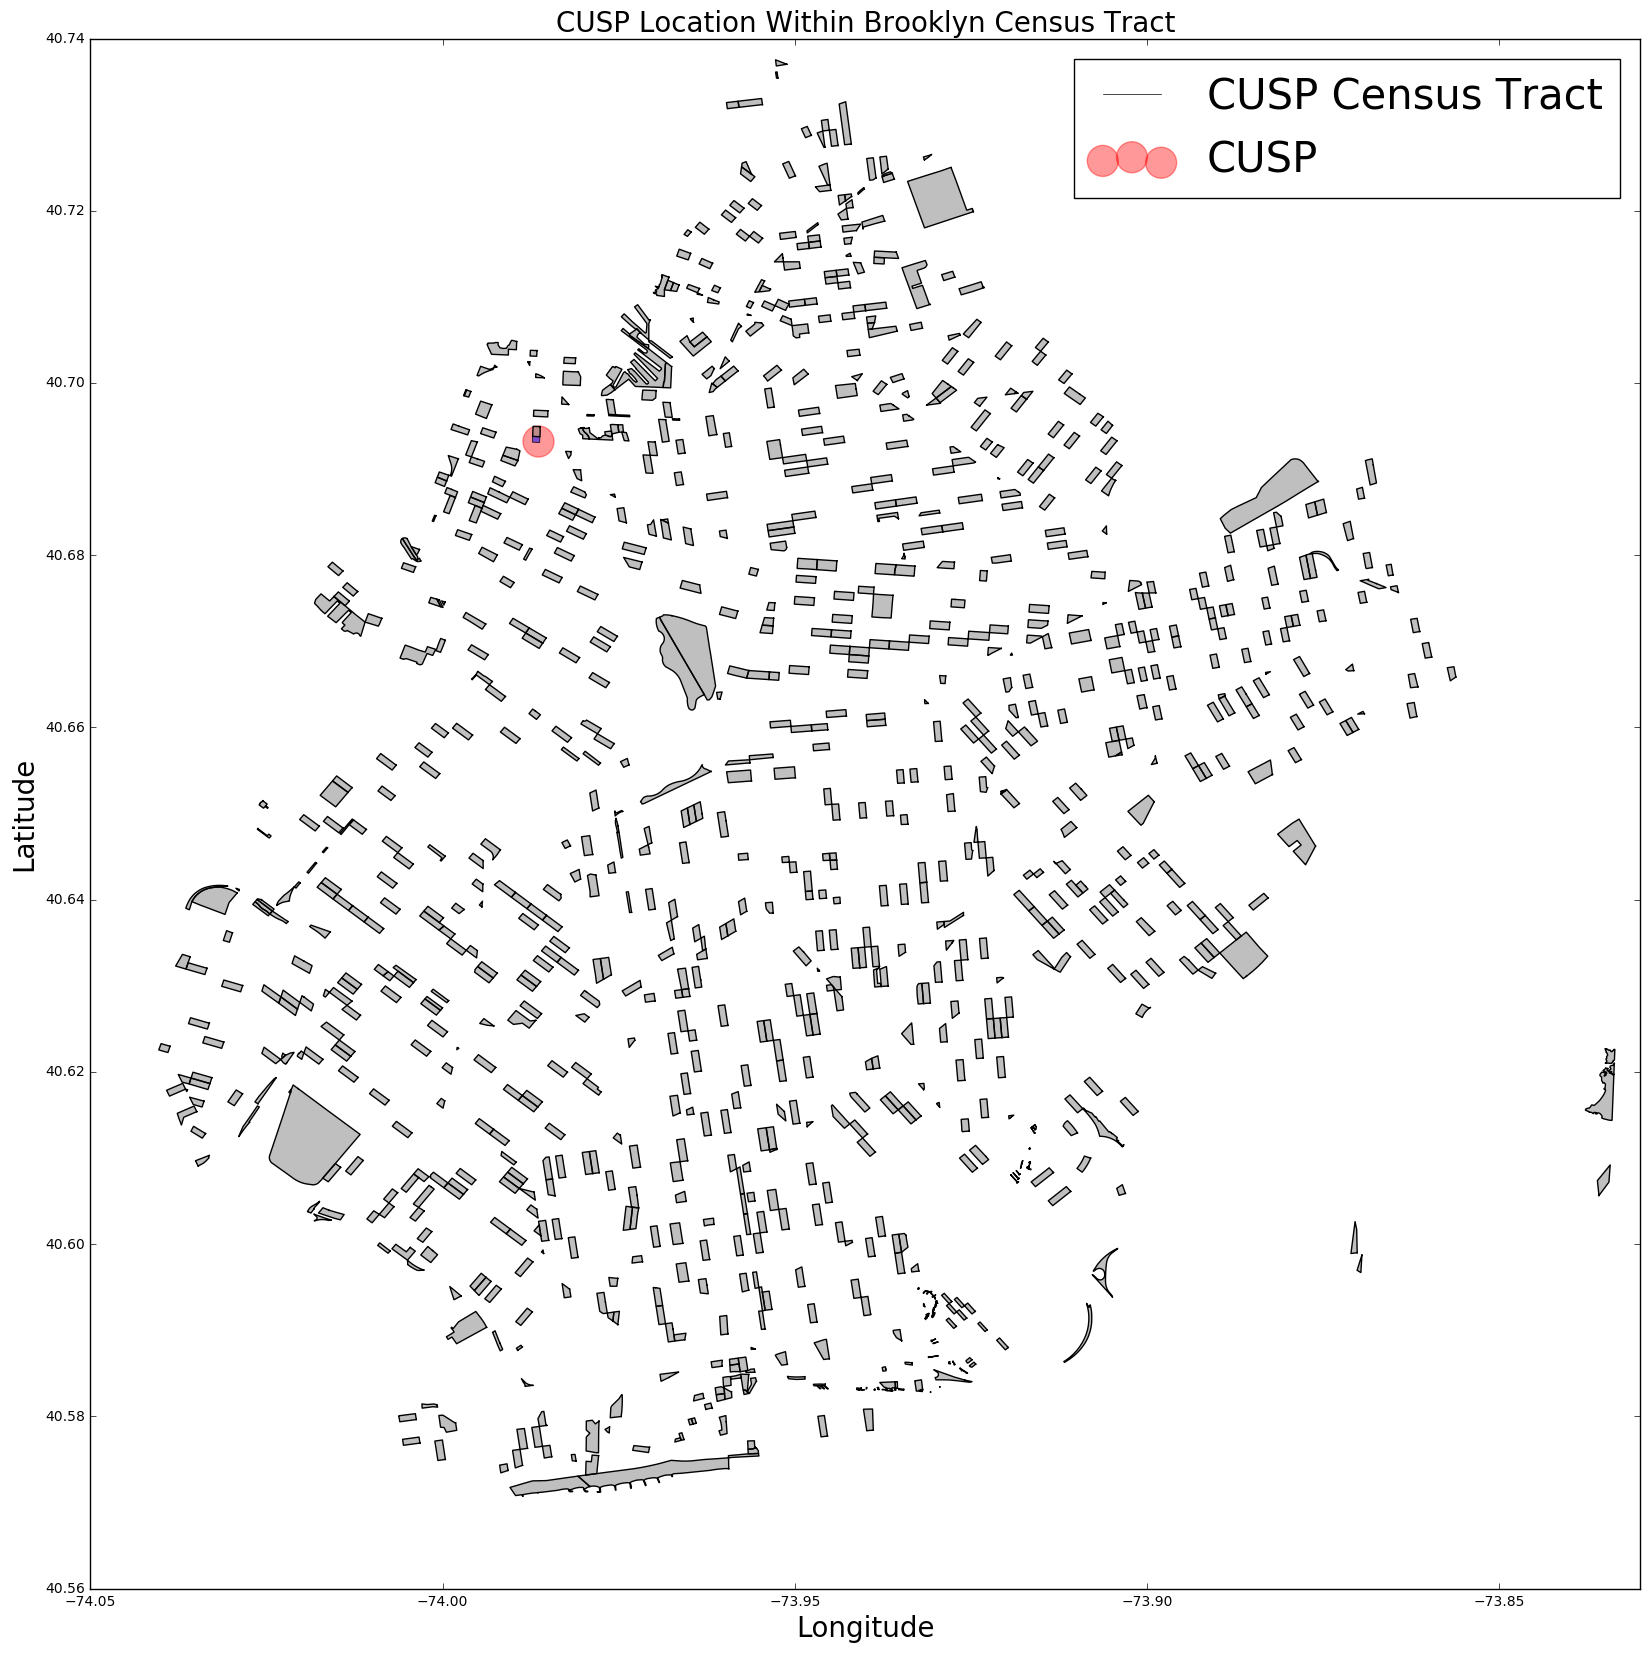

In [100]:
f, ax = pl.subplots(figsize=(20,20))
ct_latlon.loc[ct_latlon['BCTCB2010'] == '30011001009'].plot(ax = ax, color = 'blue', 
        linewidth = 0.5, label = 'CUSP Census Tract')
ct_latlon.iloc[arange(0, len(ct_latlon), 10),:].plot( ax = ax, column = 'BoroName', color = 'gray')
ax.scatter(-73.986403, 40.693217, s = 500, color ='red',alpha=0.4,label='CUSP')
ax.set_xlim(-74.05, -73.83)
ax.set_ylim(40.56, 40.74)
ax.legend(loc = 'best', fontsize=30)
ax.set_title('CUSP Location Within Brooklyn Census Tract', fontsize = 20)
ax.set_xlabel('Longitude', fontsize = 20)
ax.set_ylabel('Latitude', fontsize = 20)

Figure 1: The figure above displays every 10 Census Tracts within Brooklyn, New York. There is a blue marker indicating the census tract where NYU Center for Urban Science + Progress (CUSP) is located. CUSP itself is marked by a red dot. 